1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import optimize
from matplotlib import cm
import math
from pylab import imshow
from scipy.integrate import odeint
from matplotlib.colors import LogNorm
from scipy.fftpack import fft


%matplotlib inline

In [ ]:
def f(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)

# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2) #x restricted to -2 < x < 2
y = np.linspace(-1, 1) #y restricted to -1 < y < 1
xg, yg = np.meshgrid(x, y) 

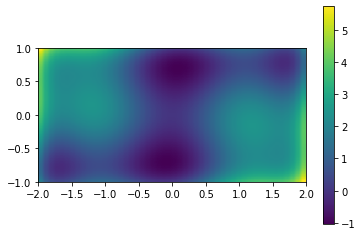

In [ ]:
# For plotting 2D
plt.figure()
plt.imshow(f([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()

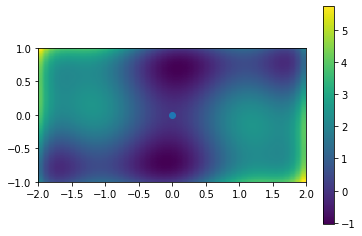

In [ ]:
x_min = optimize.minimize(f, x0=[0, 0])

plt.figure()
# Show the function in 2D
plt.imshow(f([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()

# And the minimum that we've found:
plt.scatter(x_min.x[0], x_min.x[1])

plt.show()

In [ ]:
from scipy.optimize import fmin

fmin(f,[0,0]) 
#optimize.minimize(f, x0=[0, 0])

Optimization terminated successfully.
         Current function value: -1.031628
         Iterations: 52
         Function evaluations: 101


array([-0.08985145,  0.71266538])

In [ ]:
#For finding global and local minimas
import pandas as pd

bnds = ((-2,2), (-1, 1))  #search range
minimas_list = [] 
for i in range(100):
    #used optimization in a loop with a random starting points inside the boundries


    x_init = np.random.uniform(low=bnds[0][0], high=bnds[0][1])
    y_init = np.random.uniform(low=bnds[1][0], high=bnds[1][1])

    min_test = optimize.minimize(f,[x_init, y_init], bounds = bnds)

    minimas_list.append([list(min_test.x)[0],list(min_test.x)[1], float(min_test.fun)]) #created list of minimums that i found


minima_df = pd.DataFrame(minimas_list,columns=["x","y","f(x,y)"]) #made them a dataframe so it will be easier to operate


minima_df = minima_df.round(5) #rounded after 0.0000... because eventhough it finds same values after some decimal it changes
minima_df.drop_duplicates() #i dropped duplicates to find the local and global minimums

minima_df_cols = minima_df.drop_duplicates()

minima_df_cols #unique minimas that we found.

,x,y,"f(x,y)"
0,0.08984,-0.71266,-1.03163
1,-0.08984,0.71266,-1.03163
6,1.60710,0.56865,2.10425
12,-1.70361,0.79608,-0.21546
13,1.70361,-0.79608,-0.21546
14,-1.60710,-0.56865,2.10425


Text(0.5, 0, 'f(x, y)')

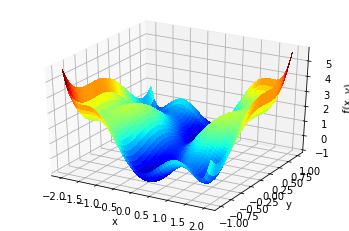

In [ ]:
# 3D surface plot of the function
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, f([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

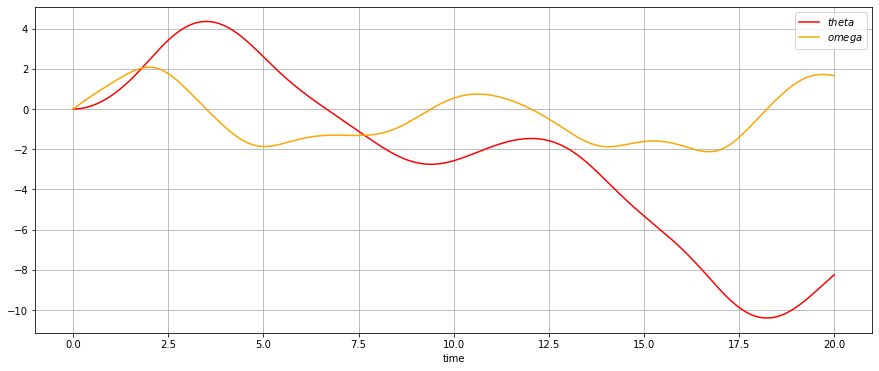

In [ ]:
Q = 2.0
d = 1.5
w = 0.65

def function(y, time, Q, w ,d):
    a = (1/Q)*-1
    theta, omega = y
    return (omega, (a*omega)+np.sin(theta)+d*np.cos(w*time))

t = np.linspace(0, 20, 200)
X = odeint(function, (0.0, 0.0), t, args=(Q,w,d))

plt.figure(figsize=(15, 6))
plt.plot(t, X[:, 0], 'r', label="$theta$")
plt.plot(t, X[:, 1], 'orange', label="$omega$")
plt.xlabel('time')
plt.legend()
plt.grid()
plt.show()


3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300


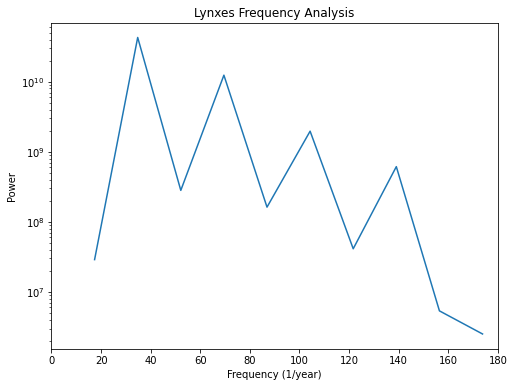

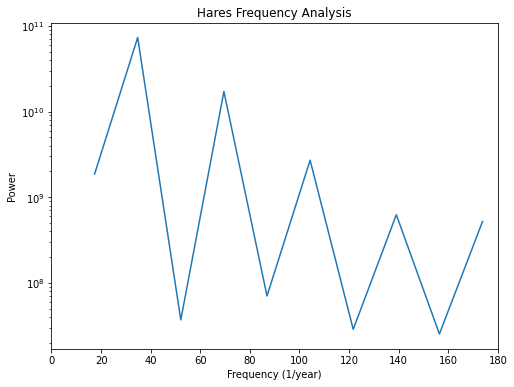

In [ ]:
from scipy import fftpack

#!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/
fname = '/content/populations.txt'
!cat /content/populations.txt
populations_data = np.loadtxt(fname)
year, hares, lynxes, carrots = populations_data.T

x = hares
y = lynxes

lynxes_fft = fftpack.fft(y)
lynxes_psd = np.abs(lynxes_fft)**2
freq_lynxes = fftpack.fftfreq(len(y), 1. /365)

hares_fft = fftpack.fft(x)
hares_psd = np.abs(hares_fft)**2
freq_hares = fftpack.fftfreq(len(x), 1. /365)

i = freq_hares > 0
j = freq_lynxes > 0

plt.figure(figsize = (8,6))
plt.plot(freq_lynxes[j], lynxes_psd[j])
plt.xlim(0,180)
plt.title('Lynxes Frequency Analysis')
plt.xlabel('Frequency (1/year)')
plt.ylabel('Power')
plt.yscale('log')

#axes = plt.axes([0.55, 0.55, 0.3, 0.3])
#plt.plot(freq_lynxes[:2], lynxes_psd[:2])
#plt.setp(axes, yticks=[])
#plt.yscale('log')

plt.figure(figsize = (8,6))
plt.plot(freq_hares[i], hares_psd[i])
plt.xlim(0,180)
plt.title('Hares Frequency Analysis')
plt.xlabel('Frequency (1/year)')
plt.ylabel('Power')
plt.yscale('log')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

0 0


NameError: ignored

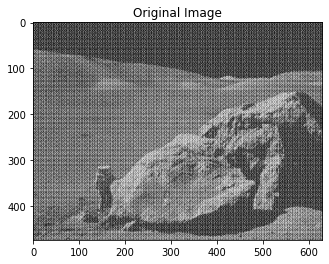

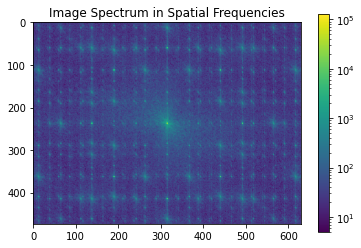

<Figure size 432x288 with 0 Axes>

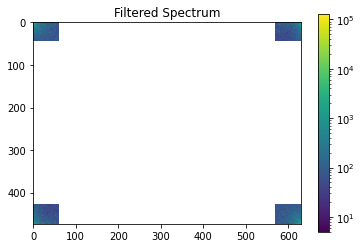

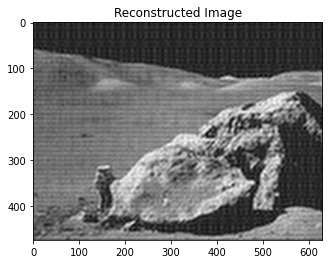

In [ ]:
from matplotlib.colors import LogNorm
import math
import scipy
from scipy import*
from scipy.fftpack import*
from scipy.fftpack import fft, ifft, fft2
from scipy import fftpack


#Importing and examining the image 
imm = plt.imread("/content/moonlanding.png")
plt.imshow(imm, plt.cm.gray)
plt.title('Original Image')
plt.figure()

#Computing the 2D-FFT on the image
imm_fft = fftpack.fft2(imm)
imm_fft_shifted = fftpack.fftshift(imm_fft)
power = np.abs(imm_fft)
shifted_power = np.abs(imm_fft_shifted)
#power_shifted = fftpack.fftshift(power)
sample_freq = fftpack.fftfreq(imm.size)
plt.imshow(shifted_power, norm = LogNorm(vmin=5))
plt.title('Image Spectrum in Spatial Frequencies')
plt.colorbar()
plt.figure()

#Since what we have is a periodic noise, we need to remove the frequencies, leaving onlu the DC component

imm_fft2 = imm_fft.copy()
r = int(imm.shape[0])
c = int(imm.shape[1])

#I want to see if the max val (the peak) of the power is in posizion (0,0) (or in the centre of the spectrum in the shifted version)
idx1 = np.argmax(power[0])
idx2 = np.argmax(power[1])
print(idx1,idx2) #ok

#Let's put equal to zero all the other frequencies, with the exception of the DC component
keep_fraction = 0.1
imm_fft2[int(r*keep_fraction):int(r*(1-keep_fraction)),:] = 0
imm_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

#Plot the Reconstructed Image and the Filtered Spectrum
plt.figure()
plt.imshow((np.abs(imm_fft2)), norm = LogNorm(vmin=5))
plt.colorbar()
plt.title('Filtered Spectrum')

im_rec = fftpack.ifft2(imm_fft2).real

plt.figure()
plt.imshow(im_rec, plt.cm.gray)
plt.title('Reconstructed Image')

im_new = fftpack.ifft2(img_fourier_copy).real
fig = plt.figure(figsize=(8, 5))
gs = mpl.gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=[2])

ax_original = fig.add_subplot(gs[0, 0])
ax_reconstruct = fig.add_subplot(gs[0, 1])

ax_original.imshow(im, plt.cm.gray)
ax_original.set_title("Original image")
ax_reconstruct.imshow(im_new, plt.cm.gray)
ax_reconstruct.set_title("Reconstructed Image")